<a href="https://colab.research.google.com/github/otaviodefilpo/twitter-scrapping-with-twint-localnewscase/blob/main/Twitter_Scrapping_com_Twint_do_JL1_Ot%C3%A1vio_de_Filpo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise das interações no Twitter do JL1 no mês de Janeiro de 2021**

<img src='https://www.oliberal.com/image/contentid/policy:1.179424:1564867770/Dino-dom-01-Pri.jpg?f=2x1&$p$f=6dd76b0&w=1500&$w=f075b93'>

# **Introdução**
O Jornal Liberal 1ª Edição, mais conhecido como o JL1, é o jornal local do Pará na hora do almoço, na maior emissora do estado. O jornal é o responsável por atualizar os paraenses, no meio do dia, sobre as notícias mais importantes do estado com muita credibilidade.

O programa tem uma característica muito interessante, que é usar bastante a participação do público via Twitter, por meio da Hashtag **#VCnoJL1**, permitindo que o povo possa manifestar sua voz.

Portanto, esse projeto de análise exploratória de dados pretende entender por meio do Scrapping no Twitter como o público do JL1 se comportou no mês de janeiro.

# **Obtenção dos dados**
Farei o scrapping de Tweets usando o pacote Twint, que é uma ferramenta bem poderosa, que permite você ir além das limitações do Twitter API.
Como é um pacote em desenvolvimento, recomendo você ler a documentação dele [NESTE LINK]('https://github.com/twintproject/twint'), pois eu tive que fazer algumas adaptações na instalação sempre que o utilizei, mas vai variar de qual plataforma você está usando e quais pacotes você já tem instalados no seu ambiente.
Mãos à obra!

In [ ]:
# Instalando Twint
!pip install --upgrade git+https://github.com/twintproject/twint.git@origin/master#egg=twint -q

O pacote `nest_asyncio`, por recomendação dos autores deve ser utilizado quando você estiver usando o `twint` num Jupyter Notebook.

In [ ]:
# Importando bibliotecas necessárias
import twint
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import nest_asyncio
nest_asyncio.apply()

Como já vimos na introdução, o Jornal Liberal 1ª Edição utiliza bastante a sua hashtag, então nós a utilizaremos como busca para entender as interações do público com o programa.

In [ ]:
# Fazendo Scrapping de Tweets
c = twint.Config()

c.Since = "2021-01-01"
c.Search = "#vcnojl1"
c.Store_csv = True
c.Output = "tweetsjl1.csv"

Após este comando, o arquivo será salvo no seu diretório escolhido.

É importante você fazer o download do arquivo para não precisar do mesmo processamento toda vez que for mudar algo novo no projeto

# **Dicionário de Variáveis**
Após o scrapping de tweets com Twint, o seu arquivo virá com as seguintes variáveis:

`id` - Identificador do tweet

`conversation_id` - Identificador da conversa

`created_at` - Data e hora do Tweet

`date` - Data do Tweet

`time` - Hora do Tweet

`timezone` - Fuso horário do local

`user_id` - Identificador do usuário

`username` - Nome de usuário

`name` - Nome do perfil do usuário

`place` - Local

`tweet` - Texto do Tweet

`language` - Idioma do Tweet

`mentions` - Usuários mencionados no tweet

`urls` - Links presentes no tweet
 
`photos` - Fotos presentes no tweets

`replies_count` - Contagem de respostas

`retweets_count` - Contagem de retweets

`likes_count` - Contagem de curtidas

`hashtags` - Hashtags presentes

`cashtags` - ***Não identificado***

`link` - Link do tweet

`retweet` - Se é retweet

`quote_url` - ***Não identificado***

`video` - Vídeos no tweet

`thumbnail` - Imagem do vídeo

`near` - Perto de

`geo` - Local do retweet

`source` - Quem retuítou

`user_rt_id` - Identificador do usuário que retuítou

`user_rt` - Usário que retuítou

`retweet_id` - Identificador do retweet

`reply_to` - Resposta à quem

`retweet_date` - Data do Retweet

`translate` - Tradução

`trans_src` - ***Não identificado***

`trans_dest` - ***Não identificado***

Agora vamos começar a exploração do dataset

# **Exploração dos dados**
Vamos entender melhor como os dados obtidos a partir do Twint se comportam e estão guardados.

In [ ]:
# Importando o arquivo que deixei disponível no github
df = pd.read_csv('https://raw.githubusercontent.com/otaviodefilpo/projects/main/tweetsjl1.csv')
# Garantindo que os tweets ou links não serão cortados
pd.set_option('max_colwidth', 500)

In [ ]:
# Agora faremos um backup do arquivo original, para pode começar nossos trabalhos
tweets_jl1 = df.copy()

In [ ]:
# Mostrando as 5 primeiras linhas
tweets_jl1.head(5)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1362155215726731267,1362155215726731267,2021-02-17 21:41:25 UTC,2021-02-17,21:41:25,0,711286012819931136,edilzapinheiro,Edilza Pinheiro,NaN,"Pq somos obrigados a comprar sacolas plásticas nos supermercados, visto que as sacolas são patrocinadas pelo governo do Pará @helderbarbalho ??? Injusto isso. Tudo bem que o meio ambiente agradece, mas isso já é demais. Estamos pagando 2X pela sacola. #Pará #VCnoJL1 #VCnoJL2 https://t.co/61mdkAOnNr",pt,"[{'screen_name': 'helderbarbalho', 'name': 'helder barbalho', 'id': '151653693'}]",[],['https://pbs.twimg.com/media/EudY8xSWgAMsDbV.jpg'],0,0,1,"['pará', 'vcnojl1', 'vcnojl2']",[],https://twitter.com/edilzapinheiro/status/1362155215726731267,False,NaN,1,https://pbs.twimg.com/media/EudY8xSWgAMsDbV.jpg,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1362068855460401157,1362068855460401157,2021-02-17 15:58:15 UTC,2021-02-17,15:58:15,0,2896584603,im_vickygui,𝑉𝑖𝑐𝑘𝑦 🌻🦋🌌,NaN,"#VCnoJL1 faço tratamento da Fibromialgia à 2 anos, tenho 22 anos, e desejo que todos que são portadores dessa doença, se cuidem, façam exercícios físicos, se alimentem bem, pois se não há cura, no mínimo temos o conforto! ❤🦋",pt,[],[],[],0,0,0,['vcnojl1'],[],https://twitter.com/im_vickygui/status/1362068855460401157,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1362068649125773312,1362068649125773312,2021-02-17 15:57:26 UTC,2021-02-17,15:57:26,0,944891600,carlaqafonso,Carla Afonso,NaN,"rabo do peru não teve, mas a distribuição de sopa rolou 🦃 eu amo a vila sorriso #VCnoJL1 https://t.co/ygL3HmkXU0",pt,[],[],['https://pbs.twimg.com/media/EucJ9wPXAAI3KDG.jpg'],2,0,13,['vcnojl1'],[],https://twitter.com/carlaqafonso/status/1362068649125773312,False,NaN,1,https://pbs.twimg.com/media/EucJ9wPXAAI3KDG.jpg,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1362068605337292804,1362068605337292804,2021-02-17 15:57:16 UTC,2021-02-17,15:57:16,0,84848379,ana_lurocha,Ana Lu 🅙,NaN,Esse macacão da Gabriella tá tuuuudo! Kero um igual #VCnoJL1,pt,[],[],[],0,0,3,['vcnojl1'],[],https://twitter.com/ana_lurocha/status/1362068605337292804,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1362068271743303683,1362068271743303683,2021-02-17 15:55:56 UTC,2021-02-17,15:55:56,0,587768796,gilberto_geo,Gilberto_Palheta 2020,NaN,É Priscila o Rabo do Peru seguiu os protocolos sanitários e ficou em casa 👏🏻👏🏻👏🏻 #VCnoJL1 https://t.co/T5P6WmPfPS,pt,[],[],['https://pbs.twimg.com/media/EucJ331XAAEn8wc.jpg'],0,0,0,['vcnojl1'],[],https://twitter.com/Gilberto_Geo/status/1362068271743303683,False,NaN,1,https://pbs.twimg.com/media/EucJ331XAAEn8wc.jpg,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


Agora vamos observar qual a porcentagem de valores ausentes em cada coluna

In [ ]:
(tweets_jl1.isnull().sum() / tweets_jl1.shape[0]).sort_values(ascending = False)

trans_dest         1.000000
translate          1.000000
retweet_date       1.000000
place              1.000000
retweet_id         1.000000
user_rt            1.000000
user_rt_id         1.000000
source             1.000000
geo                1.000000
near               1.000000
trans_src          1.000000
quote_url          0.993786
thumbnail          0.808616
created_at         0.000000
date               0.000000
time               0.000000
timezone           0.000000
user_id            0.000000
language           0.000000
username           0.000000
name               0.000000
conversation_id    0.000000
tweet              0.000000
likes_count        0.000000
mentions           0.000000
urls               0.000000
photos             0.000000
replies_count      0.000000
retweets_count     0.000000
hashtags           0.000000
cashtags           0.000000
link               0.000000
retweet            0.000000
video              0.000000
reply_to           0.000000
id                 0

Percebe-se que as variáveis `trans_dest`, `translate`, `retweet_date`, `place`, `retweet_id`, `user_rt`, `user_rt_id`, `source`, `geo`, `near`, `trans_src`, `quote_url` e `thumbnail` tem porcentagem de valores ausentes entre 80% e 100%, então vamos removê-las do nosso dataframe.

In [ ]:
# Usando a função drop do Pandas para remover as colunas
tweets_jl1 = tweets_jl1.drop(columns=['trans_dest', 'translate', 'retweet_date', 'place', 'retweet_id', 'user_rt',
                                      'user_rt_id', 'source', 'geo', 'near', 'trans_src', 'quote_url','thumbnail'])

print("O nosso Dataframe atualizado possui {} entradas e {} variáveis".format(tweets_jl1.shape[0],tweets_jl1.shape[1]))

O nosso Dataframe atualizado possui 2414 entradas e 23 variáveis


Agora vamos verificar os tipos de dados presentes no nosso dataframe

In [ ]:
# Verificando os tipos e números de valores ausentes do dataframe
tweets_jl1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2414 entries, 0 to 2413
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               2414 non-null   int64 
 1   conversation_id  2414 non-null   int64 
 2   created_at       2414 non-null   object
 3   date             2414 non-null   object
 4   time             2414 non-null   object
 5   timezone         2414 non-null   int64 
 6   user_id          2414 non-null   int64 
 7   username         2414 non-null   object
 8   name             2414 non-null   object
 9   tweet            2414 non-null   object
 10  language         2414 non-null   object
 11  mentions         2414 non-null   object
 12  urls             2414 non-null   object
 13  photos           2414 non-null   object
 14  replies_count    2414 non-null   int64 
 15  retweets_count   2414 non-null   int64 
 16  likes_count      2414 non-null   int64 
 17  hashtags         2414 non-null   

Percebe-se que temos as colunas `created_at`, `date` e `time `em modo object, vamos convertê-las para datetime

In [ ]:
# Convertendo as colunas para Datetime
tweets_jl1['created_at'] = pd.to_datetime(tweets_jl1.created_at)
tweets_jl1['date'] = pd.to_datetime(tweets_jl1.date)
tweets_jl1['time'] = pd.to_datetime(tweets_jl1.time)

Agora vamos verificar se a colunas estão convertidas para datetime

In [ ]:
# Verificando os tipos das nossas variáveis
tweets_jl1.dtypes

id                               int64
conversation_id                  int64
created_at         datetime64[ns, UTC]
date                    datetime64[ns]
time                    datetime64[ns]
timezone                         int64
user_id                          int64
username                        object
name                            object
tweet                           object
language                        object
mentions                        object
urls                            object
photos                          object
replies_count                    int64
retweets_count                   int64
likes_count                      int64
hashtags                        object
cashtags                        object
link                            object
retweet                           bool
video                            int64
reply_to                        object
dtype: object

# **Limpeza dos dados**

Como nosso interesse de análise é apenas para o mês de janeiro, vamos criar um novo dataframe apenas para esse mês

In [ ]:
# Criando novo Dataframe
tweets_jan = tweets_jl1[tweets_jl1['date'].dt.month == 1]
tweets_jan.head(3)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,video,reply_to
839,1355993036023599106,1355993036023599106,2021-01-31 21:35:07+00:00,2021-01-31,2021-02-18 21:35:07,0,1349014154053562378,solaineneusa,Solaine,#vcnoJl1 quando sair a a notícia da vacina em nossa cidade de ananinddua,pt,[],[],[],0,0,0,['vcnojl1'],[],https://twitter.com/SolaineNeusa/status/1355993036023599106,False,0,[]
840,1355975484794933252,1355975484794933252,2021-01-31 20:25:23+00:00,2021-01-31,2021-02-18 20:25:23,0,73399033,carlosbrito_jr,Carlos Britto,Povo na praia + aglomeração Muita gente nem ligou para o decreto que tem como objetivo frear os casos de covid no Estado. #vcnobdp #vcnojl1 https://t.co/A8xvudx72v,pt,[],[],[],3,1,11,"['vcnobdp', 'vcnojl1']",[],https://twitter.com/carlosbrito_jr/status/1355975484794933252,False,1,[]
841,1355551464790364166,1355551464790364166,2021-01-30 16:20:28+00:00,2021-01-30,2021-02-18 16:20:28,0,1303411510341963778,andrew_cid,Andrew Cid,#VCnoJL1 Os ônibus andam lotados. Porque não há essa fiscalização?,pt,[],[],[],0,1,0,['vcnojl1'],[],https://twitter.com/andrew_cid/status/1355551464790364166,False,0,[]


Vamos adicionar uma coluna para dia da semana no nosso Dataset, que com certeza ajudará nossos próximos passos.

In [ ]:
# Adicionando coluna dia da semana
tweets_jan['dia_semana'] = tweets_jan.date.dt.weekday

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
print('O nosso Dataframe de Tweets para o JL1 em Janeiro possui {} Entradas e {} Variáveis'.format(tweets_jan.shape[0],tweets_jan.shape[1]))

O nosso Dataframe de Tweets para o JL1 em Janeiro possui 1575 Entradas e 24 Variáveis


# **Análises no Dataset**
Vamos buscar extrair informações interessantes a partir de dados brutos.

Primeiramente vamos visualizar os tweets e usuários mais relevantes com bases nos atributos do dataset:
- Quais os tweets mais curtidos?
- Quais os mais retweetados?
- Quais os mais respondidos?
- Qual telespectador participa mais do programa?

### **Tweet mais curtido**

In [ ]:
# encontrando os 5 primeiros
tweets_jan.likes_count.sort_values(ascending= False)[:5]

1740    106
1895     40
2182     37
2065     26
1370     25
Name: likes_count, dtype: int64

Percebe-se que o tweet mais curtido têm muito mais curtidas que o segundo, então vamos procurar apenas por ele.

In [ ]:
# localizando o tweet mais curtido
tweets_jan[['date','time','username','name','tweet','likes_count']].loc[[1740]]

,date,time,username,name,tweet,likes_count
1740,2021-01-12,2021-02-18 16:34:05,belemnoventa,B90,"#VcNoJL1 Priscila Castro do Jornal Liberal caindo na pegadinha do Kiko, Zinho... Égua, Jão Predo! 🤣 https://t.co/BRIjgjJ8su",106


O tweet mais curtido do mês usando a #vcnojl1 foi feito pela conta @belemnoventa, no dia 12 de Janeiro, uma terça-feira. O tweet é sobre a pegadinha que um dos internautas fez com a apresentadora na edição deste dia.

### **Tweet mais respondido**

In [ ]:
# Encontrando os 5 primeiros
tweets_jan.replies_count.sort_values(ascending= False)[:5]

1370    20
2182    17
1740    14
2065     7
1895     7
Name: replies_count, dtype: int64

Percebe-se que os tweets com mais resposta em destaque são os 3 primeiros. Vamos localizá-los

In [ ]:
# localizando os tweets mais respondidos
tweets_jan[['date','time','username','name','tweet','replies_count']].loc[[1370,2182,1740]]

,date,time,username,name,tweet,replies_count
1370,2021-01-20,2021-02-18 14:15:17,jl1edicao,JL1 - TV Liberal,"Hoje o nosso quadro ""Fala Saúde"" vai responder as suas dúvidas sobre a vacina da Covid-19. Se você quiser mandar a sua pergunta, é só usar a #VCnoJL1 ou enviar para o nosso whatsapp 9-9943-0001. Uma infectologista vai responder o seu questionamento.",20
2182,2021-01-06,2021-02-18 14:37:24,jl1edicao,JL1 - TV Liberal,"Hoje o quadro ""Fala Saúde"" vai falar sobre inflamações como Rinite, Otite, Faringite e Sinusite. você tem dúvidas sobre estes assuntos? Participe usando a #VCnojl1 . Um especialista vai tirar as suas dúvidas, logo mais, no JL1.",17
1740,2021-01-12,2021-02-18 16:34:05,belemnoventa,B90,"#VcNoJL1 Priscila Castro do Jornal Liberal caindo na pegadinha do Kiko, Zinho... Égua, Jão Predo! 🤣 https://t.co/BRIjgjJ8su",14


Observamos que os dois primeiros tweets mais respondidos são do quadro "Fala Saúde", com o primeiro, do dia 20 de Janeiro sendo sobre o tema mais relevante em saúde do momento, as vacinas do COVID-19 e o segundo, do dia 6 de Janeiro sendo sobre problemas de saúde muito comuns no dia a dia, justificando a alta de respostas diretas ao tweet. O terceiro já vimos acima, pois foi o mais curtido também.

### **Tweet mais retweetado**

In [ ]:
# Encontrando os 5 primeiros
tweets_jan.retweets_count.sort_values(ascending = False)[:5]

1740    32
929      7
1120     7
1729     3
1917     3
Name: retweets_count, dtype: int64

O tweet mais retweetado foi também o tweet mais curtido, do dia que a apresentadora Priscila Castro caiu numa pegadinha de um telespectador

In [ ]:
# Localizando o tweet mais retweetado
tweets_jan[['date','time','username','name','tweet','retweets_count']].loc[[1740]]

,date,time,username,name,tweet,retweets_count
1740,2021-01-12,2021-02-18 16:34:05,belemnoventa,B90,"#VcNoJL1 Priscila Castro do Jornal Liberal caindo na pegadinha do Kiko, Zinho... Égua, Jão Predo! 🤣 https://t.co/BRIjgjJ8su",32


### **Usuários com mais participações no mês de Janeiro**


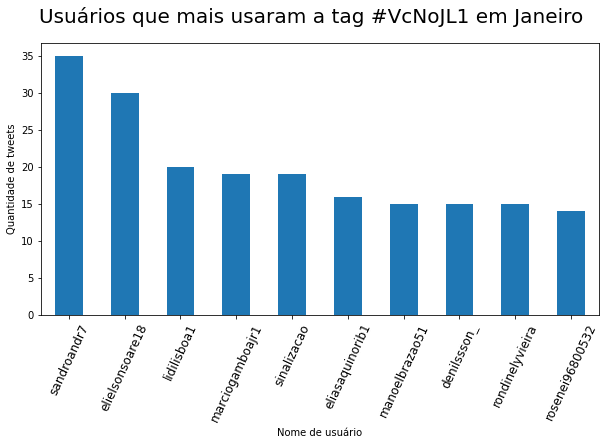

In [ ]:
# Encontrando os 10 usuários mais participativos
participacao = tweets_jan.groupby(['username'])['tweet'].count().sort_values(ascending=False)[:10]

# Plotando gráfico dos usuários que mais usaram a tag #VCnoJL1
participacao.plot(kind='bar', figsize=(10,5))
plt.xlabel('Nome de usuário')
plt.ylabel('Quantidade de tweets')
plt.xticks(rotation =65, fontsize=12)
plt.suptitle('Usuários que mais usaram a tag #VcNoJL1 em Janeiro', fontsize=20)

plt.show()

Podemos observar que os usuários **@sandroandr7** e **@elielsonsoare18** são os que mais interagiram usando a tag **#VCnoJL1** em Janeiro, bem à frente dos demais.

# **Análises Gerais para o mês**
Agora que já observamos dados mais pontuais, vamos analisar dados mais gerais:
- Qual o dia da semana com maior média de participações?
- Quais horas do dia há mais participações?
- Como as interações se comportaram ao longo do mês?

### **Dia da semana mais relevante**
Para não mexermos no nosso dataset principal por enquanto, vamos fazer um backup para um auxiliar

In [ ]:
# fazendo backup do dataset principal
aux_dia = tweets_jan.copy()

# Contando quanto de cada dia da semana houve no mês de Janeiro
aux_dia = aux_dia.drop_duplicates(['date'])
cont_dias = aux_dia.dia_semana.value_counts()

# Agrupando por dia da semana
grp_dia = tweets_jan.groupby(['dia_semana'])['tweet'].count()

# Fazendo a média de interações no Twitter para cada dia da semana
media = grp_dia / cont_dias

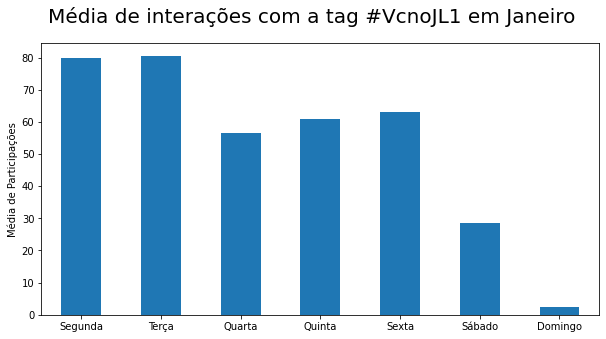

In [ ]:
#Criando uma lista que servirá para preenchimento dos nossos valores
dias_seman = ['Segunda','Terça','Quarta','Quinta','Sexta','Sábado','Domingo']

#Plotando o gráfico
fig, ax = plt.subplots(figsize=(10,5))
media.plot(kind='bar')
plt.ylabel('Média de Participações')
plt.xticks([x for x in range(len(media))],dias_seman, rotation=0)
plt.suptitle('Média de interações com a tag #VcnoJL1 em Janeiro', fontsize=20)

plt.show()

#### **Por que usei a média das interações com a tag #VCnoJL1?**

A média representa melhor quantas interações temos para cada dia da semana, porque se utilizássemos os números absolutos, nós poderiamos enviezar nosso gráfico, pois os meses não têm a mesma quantidade de segundas, terças, quartas etc.

Sendo assim, conseguimos observar que a média de interações é bem maior às segundas e às terças do que o restante dos dias, com a quarta, no meio da semana sendo o dia com menor número de interações.

Isso pode se dever à segunda ser o primeiro dia da semana em que o programa é transmitido, já temos uma observação contraintuitiva na quarta, pois é o dia que o quadro "Fala saúde" é transmitido, com perguntas diretas do público e mesmo assim é o que possui a menor média de interações dos dias úteis da semana.

####**Por que essa informação é importante?**

Como já falamos anteriormente, o JL1 é um programa que utiliza bastante a interação por meio do twitter, então observar qual dia da semana há mais participação pode ser um indicador importante do sucesso do que está sendo transmitido.

Observações como as que fizemos acima podem ajudar um tomador de decisões do programa a entender o que funciona e o que deve ser melhorado, com base nas interações.

Ressaltando que uma análise exploratória de dados, como esta, serve para encontrar tendências e formular hipóteses, com teste de causa e consequência podendo ser feitos posteriormente.

### **Horas mais relevantes do dia**

Vamos criar um dataset auxiliar para melhoramos nosso poder de análise aqui.

In [ ]:
#Fazendo backup do dataset original
h_rel = tweets_jan.copy()

#Criando uma nova coluna para auxiliar nossa visualização de horas.
h_rel['hora_dia'] = h_rel.time.dt.hour

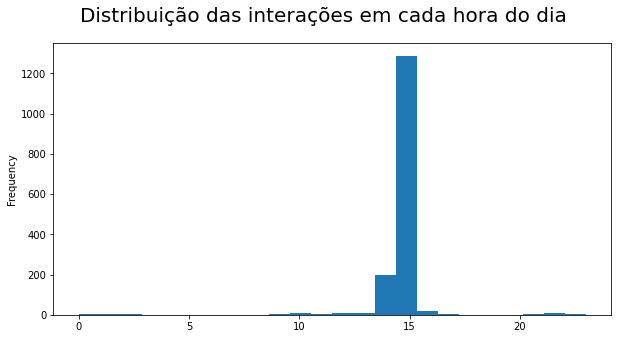

In [ ]:
#Plotando um histograma das horas
h_rel.hora_dia.plot(kind='hist', bins=24, figsize=(10,5))
plt.suptitle('Distribuição das interações em cada hora do dia', fontsize=20)
plt.show()

#### **Por que aqui usamos um histograma?**
Diferentemente dos dias da semana com mais interações, todos os dias possuem o mesmo número de horas, portanto fica máis fácil de fazer uma análise gráfica, sem precisar balancear por média.

#### **Por que essa informação é importante?**
Essa análise pode parecer meio óbvia, pois as horas do dia com mais interações claramente seriam as mais próximas à transmissão do programa, mas o detalhe é que podemos ver que as horas posteriores ao programa são as que tem mais interações, até mais do que durante o programa.

Também pode ser extraído daqui, que como as interações diminuem bruscamente até às 15 horas, logo possíveis perguntas do público para o dia seguinte podem já serem escolhidas a partir desse horário, sem muitos prejuízos de boas ideias ou perguntas vindas do público.

### **Comportamento das interações ao longo do mês**
Começaremos novamente fazendo um backup do dataset original

Text(0.5, 0.98, 'Comportamento das interações com a tag #VCnoJL1 em Janeiro')

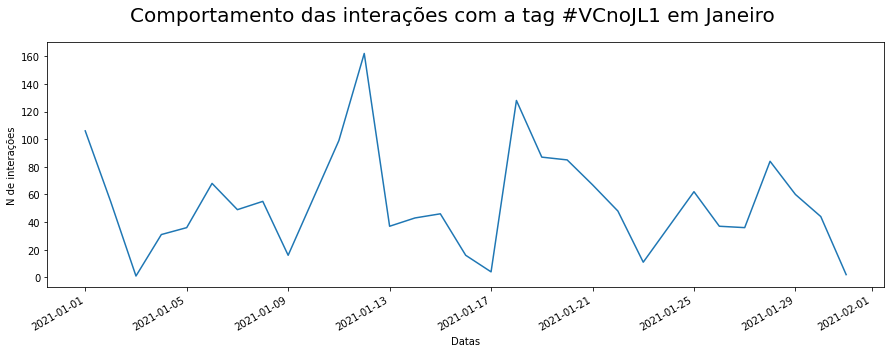

In [ ]:
#Fazendo backup
comp_mes = tweets_jan.copy()

#Agrupando por cada dia no mês
group_dmes = comp_mes.groupby(['date'])['tweet'].count()

#Plotando o gráfico em linha
fig, ax = plt.subplots(figsize=(15,5))
group_dmes.plot(kind='line')
plt.xlabel('Datas')
plt.ylabel('N de interações')
plt.suptitle('Comportamento das interações com a tag #VCnoJL1 em Janeiro', fontsize=20)

#### **Por que um gráfico de linhas?**
Os gráficos de linhas são ideais para visualizarmos como foi o comportamento de alguma variável ao longo do tempo, como utilizado aqui, para os dias de Janeiro.

#### **Por que essa informação é importante?**

Pelo gráfico, podemos perceber que além do dia 01 de Janeiro, impulsionado pelos desejos de "Feliz ano novo", o maior número de interações aconteceu nos dias 12 e 18 de Janeiro, no meio do mês, não se repetindo mais em outros dias.

Essa informação para um tomador de decisão pode ajudar buscar os resultados desses dias específicos para os outros dias do mês também, entendendo o que aconteceu para propor soluções.

# **Nuvem de palavras**
para finalizar nossas análises, vamos observar quais as palavras mais observadas nos tweets ao longo de Janeiro.

Vamos começar importando pacotes e escolhendo apenas a coluna `tweet` do dataset original

In [ ]:
#Importando pacotes necessários
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
#Escolhendo apenas a variável de interesse
tweets_np = tweets_jan['tweet']

In [ ]:
#Verificando se os dados estão como esperados, usando loclaizações aleatórias
display(tweets_np.iloc[800])
display(tweets_np.iloc[1000])
display(tweets_np.iloc[1400])

'#VCnoJL1 temos que ajudar sim os amazonenses ,todos nós estamos na luta contra o Covid 19 ,menos o nosso presidente!!!Deus proteja todos nós!!'

'Parabéns minha cidade morena, onde há Amor e Carinho imensurável a Todos.  #ParabensBelem405Anos.  #VCnoJL1'

'#VCnoJL1  A educação ambiental precisa ser assumida por todas as prefeituras paraenses como uma política pública urgente e necessária para mudar a mentalidade depredatória presente na sociedade.'

Tudo está organizado, vamos começar a produzir nossa nuvem de palavras, o passo inicial é concatenar todas as linhas do nosso dataset.

In [ ]:
# Concatenando os tweets
tweets_concat = "".join(t for t in tweets_np)

# Agora verificando quantas palavras temos
print("Quantidade de palavras: {}".format(len(tweets_concat)))

Quantidade de palavras: 239703


Com as palavras já concatenadas vamos definir as "Stopwords" que são as conjuções verbais, artigos etc. Palavras que não são chave para o entendimento das frases, portante precisamos eliminá-las da nuvem de palavras.

In [ ]:
# Definindo as stopwords
stopwords = set(STOPWORDS)
stopwords.update(['da','meu','em','você','de','ao','os','e','pois','mas','#vcnojl1','vcnojl1','que',
                  'para','se','essa','pra','esse','por','ter','aos','dos','vc','quem','pela','são',
                  'https','co','esses','isso','nos','ser','seu','desse','essas','sou','qual',
                  'pq','tão','sua','nosso','mai','na','uma','um','tem','ou','eu','das','porque','foram',
                  'quando','quanto','ainda','estão','está','pro','como','mais','já','todo',
                  'só','aqui','muito','vai','Deu','foi','ela','ele','sem','tá','até','coisa',
                  'também','será','pessoa','ano','seja','todos','pode','outro','tudo','nem','sobre',
                  'não','sim','minha','muita','toda','nao','tenho','fica','agora','suas','vão',
                  'todas','teve','nas','nos','dá','elas','eles','ver','fazer','tanto','ai','aí',
                  'VcnoJL1Boa tarde','JL1edicao','VcnoJl10','assim','nossa','pelo','faz','dessa'])

Agora sim vamos partir criar a nuvem de palavras!

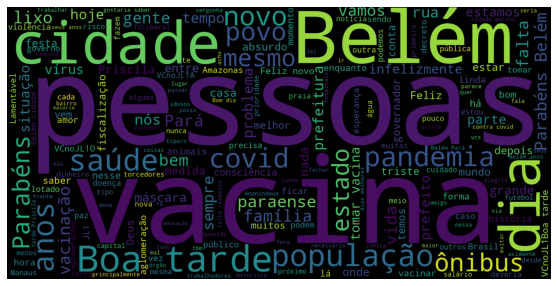

In [ ]:
# Gerando a nuvem de palavras
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1600, height =800).generate(tweets_concat)

# Mostrando a imagem
fig, ax = plt.subplots(figsize=(10,5))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud);

In [ ]:
# Antes de continuar, vamos salvar nossa imagem
wordcloud.to_file("/content/drive/MyDrive/projetos ds/Twitter Scrapping/nuvem de palavras - jl1.png")

Já temos a nossa nuvem de palavras, já podendo visualizar o destaque da palavra "Vacina" e cumprimentos ao aniversário de Belém. Vamos agora incrementar a visualização da nossa nuvem de palavras.

Vamos definir uma forma para nossa nuvem

In [ ]:
# Definindo formato pra nuvem
jl1_forma = np.array(Image.open('/content/drive/MyDrive/projetos ds/Twitter Scrapping/jl1 novo lp.jpg'))

Vamos gerar a nuvem de palavras de novo, mas agora com o formato que definimos

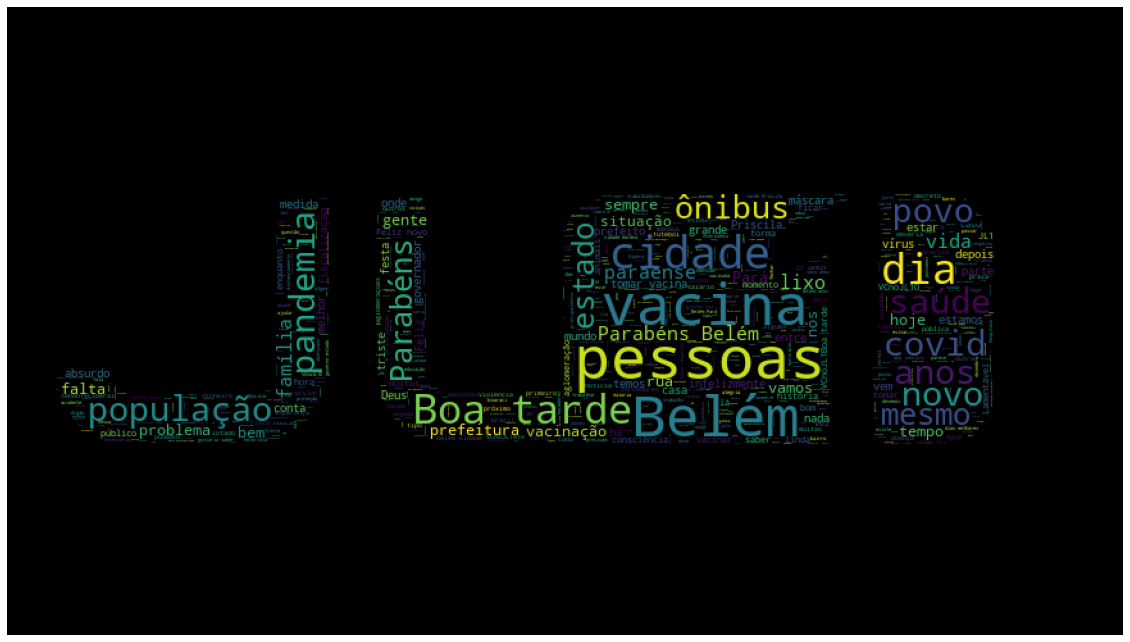

In [ ]:
# Gerando a nuvem
wordcloud = WordCloud(stopwords=stopwords,
                      background_color='black',
                      width=1000, height=1000,max_words=2000,
                      mask=jl1_forma,
                      min_font_size=1).generate(tweets_concat)

# mostrando a imagem
fig, ax = plt.subplots(figsize=(20,15))
ax.imshow(wordcloud,interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud);

In [ ]:
# Antes de continuar vamos salvar a imagem
wordcloud.to_file("/content/drive/MyDrive/projetos ds/Twitter Scrapping/nuvem de palavras - jl1 cmask.png")

#### **Por que essa informação é importante?**

Com base na interação do público, é possível entender quais os temas que estão em alta no momento, logo que o público se interessará mais. Para um tomador de decisões pode ser decisivo para o desempenho do programa e de quebra ainda poder admirar uma nuvem de palavras com a logo do programa!

# **Conclusão**
Num mundo bastante conectado, o acompanhamento em tempo real de como as redes sociais estão reagindo ao seu conteúdo pode ser decisivo para o sucesso. Análises mesmo que iniciais como está se apresentam fundamentais até para as grandes empresas, como o Grupo Liberal. É possível fazer essa análise para mais programas da TV Liberal, pois muitos também usam essa interação no Twitter.

Esse tipo de análise exploratória de dados é essencial para trabalhos mais profundos como modelos de Machine Learning etc.

---

Espero que você tenha gostado do trabalho que fiz, me acompanhe pelo meu blog do Medium e perfil no LinkedIn clicando [AQUI]('https://linktr.ee/otaviodefilpo'). Tenho mais projetos em produção e vou ficar muito feliz se você também os acompanhar.